<xarray.Dataset> Size: 71MB
Dimensions:            (time: 624, bound_pairs: 2, month: 12, latitude: 36,
                        longitude: 72)
Coordinates:
  * time               (time) datetime64[ns] 5kB 1973-01-16 ... 2024-12-16
  * month              (month) |S10 120B b'January   ' ... b'December  '
  * latitude           (latitude) float32 144B -87.5 -82.5 -77.5 ... 82.5 87.5
  * longitude          (longitude) float32 288B -177.5 -172.5 ... 172.5 177.5
Dimensions without coordinates: bound_pairs
Data variables: (12/18)
    bounds_time        (time, bound_pairs) datetime64[ns] 10kB ...
    bounds_lat         (latitude, bound_pairs) float32 288B ...
    bounds_lon         (longitude, bound_pairs) float32 576B ...
    t_anoms            (time, latitude, longitude) float32 6MB ...
    t_abs              (time, latitude, longitude) float32 6MB ...
    t_std              (time, latitude, longitude) float32 6MB ...
    ...                 ...
    t_samplingerr      (time, latitude, longit

/Users/MAC/Code/nest/.venv/lib/python3.13/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


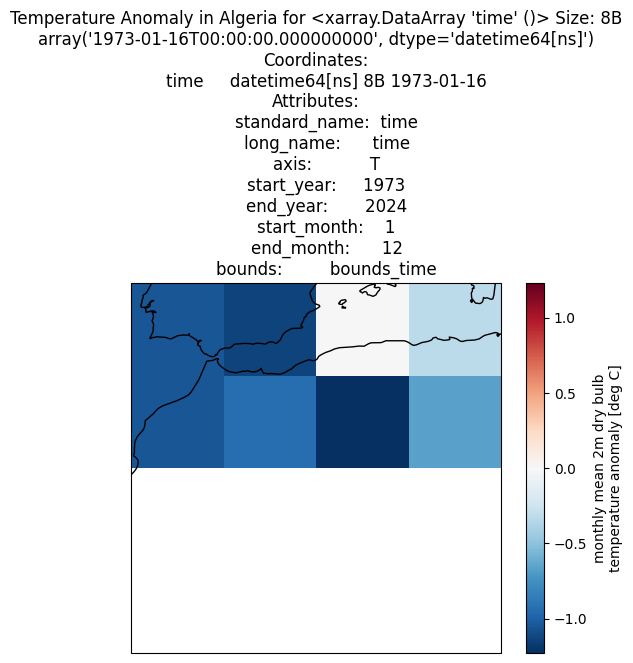

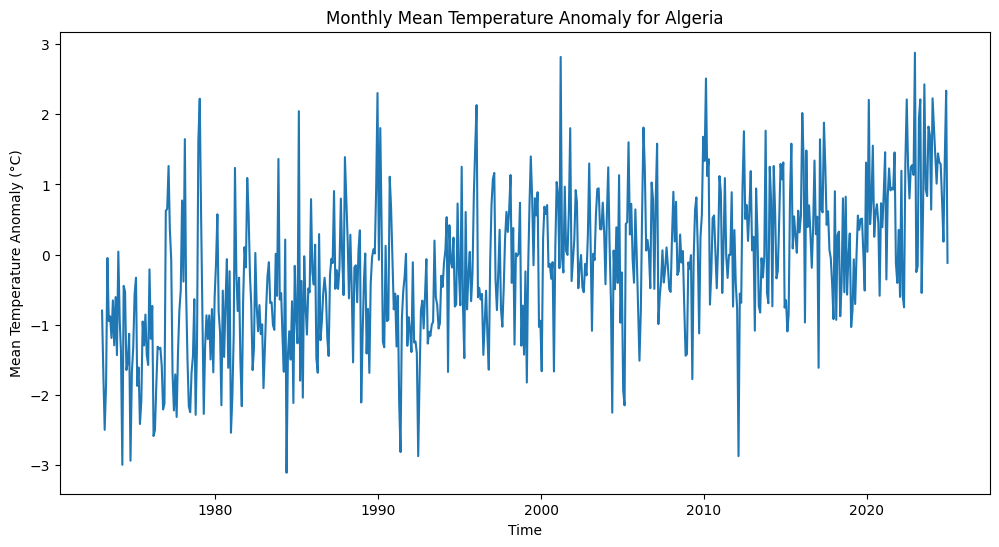

In [1]:
# Import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Step 1: Load the dataset
ds = xr.open_dataset('HadISDH.landT.4.6.1.2024f_FLATgridHOM5by5_anoms9120.nc')

# Step 2: Print dataset information to understand its structure
print(ds)

# Step 3: Verify the coordinate ranges
print('Longitude values:', ds.longitude.values)
print('Latitude values:', ds.latitude.values)

# Step 4: Define Algeria's geographical bounds
# Algeria spans approximately:
# Longitude: -9° W to 12° E (convert W to negative)
# Latitude: ~20° N to ~40° N (adjusted for grid coverage)
min_lon = -9
max_lon = 12
min_lat = 20
max_lat = 40

# Step 5: Select data for Algeria
algeria_ds = ds.sel(longitude=slice(min_lon, max_lon), latitude=slice(min_lat, max_lat))

# Step 6: Visualize temperature anomaly map for a specific time point
# For example, let's use the first time point
time_point = ds.time[0]
ax = plt.axes(projection=ccrs.PlateCarree())
algeria_ds.sel(time=time_point).t_anoms.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.coastlines()
ax.set_title(f'Temperature Anomaly in Algeria for {time_point}')

# Step 7: Compute and plot time series of mean temperature anomaly over Algeria
mean_temp_anom = algeria_ds.t_anoms.mean(dim=['latitude', 'longitude'])
plt.figure(figsize=(12, 6))
plt.plot(ds.time.values, mean_temp_anom.values)
plt.xlabel('Time')
plt.ylabel('Mean Temperature Anomaly (°C)')
plt.title('Monthly Mean Temperature Anomaly for Algeria')
plt.show()

# Step 8 (Optional): Save the Algeria subset as a new NetCDF file
# algeria_ds.to_netcdf('algeria_temp_anoms.nc')